In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

## Algorithm - 01: Jarvis March
### Explanation:
Jarvis March is a method of finding the convex hull of a finite set of points in the plane with time complexity O(nh), where n is the number of points and h is the number of points on the convex hull. It is named after R. A. Jarvis, who published the original algorithm in 1973. The algorithm is also known as the gift wrapping algorithm, since it metaphorically "wraps" gifts by finding the hull of a set of points.

### Algorithm:
1. Find the leftmost point p0 of the set P.
2. Find the point p1 that has the minimum polar angle with respect to p0. If there are several such points, choose the one that is farthest from p0.
3. Repeat step 2 until p1 = p0. The points found in this way form a chain P0, P1, ..., Pk of points on the convex hull in counterclockwise order, with Pk+1 = P0.




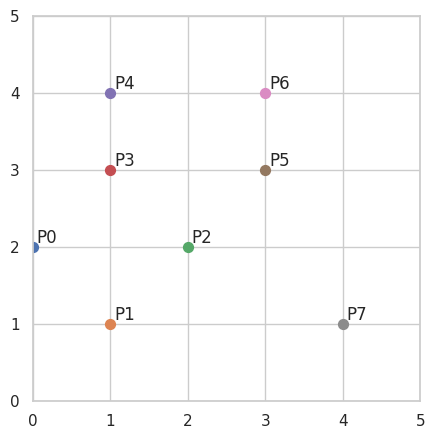

In [2]:
points = [
    (0,2, 'P0'),
    (1,1, 'P1'),
    (2,2, 'P2'),
    (1,3, 'P3'),
    (1,4, 'P4'),
    (3,3, 'P5'),
    (3,4, 'P6'),
    (4,1, 'P7'),
]

# Plot the points on the grid with labels on them
def plot_points(points):
    plt.figure(figsize=(5,5))
    plt.xlim(0,5)
    plt.ylim(0,5)
    for point in points:
        plt.scatter(point[0], point[1], s=50)
        plt.annotate(point[2], (point[0]+0.05, point[1]+0.05))
    plt.show()

plot_points(points)

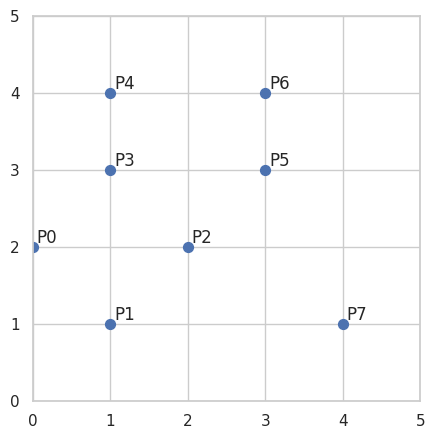

In [3]:
 # Plot minimum point in red and all others in blue
def plot_min(points, min):
    plt.figure(figsize=(5,5))
    plt.xlim(0,5)
    plt.ylim(0,5) 
    for point in points:
        if point == min:
            plt.scatter(point[0], point[1], s=100, c='r')
        else:
            plt.scatter(point[0], point[1], s=50, c='b')
        plt.annotate(point[2], (point[0]+0.05, point[1]+0.05))
    plt.show()
    
plot_min(points, min)

In [4]:
def plot_line(points, a, b):
    plt.figure(figsize=(5,5))
    plt.xlim(0,5)
    plt.ylim(0,5) 
    for point in points:
        if point == a or point == b:
            plt.scatter(point[0], point[1], s=100, c='r')
        else:
            plt.scatter(point[0], point[1], s=50, c='b')
        plt.annotate(point[2], (point[0]+0.05, point[1]+0.05))
    plt.plot([a[0], b[0]], [a[1], b[1]], c='g')
    plt.show()

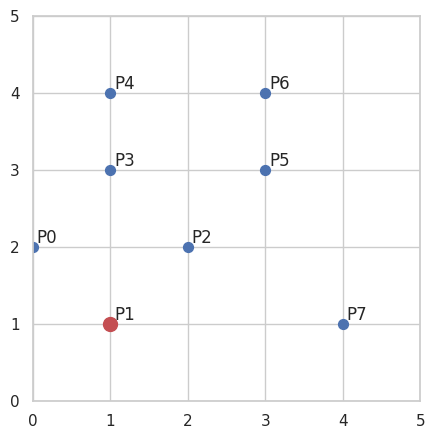

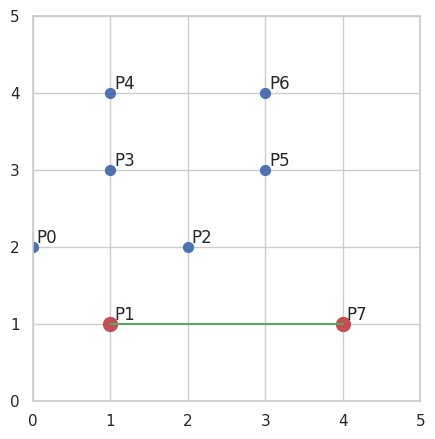

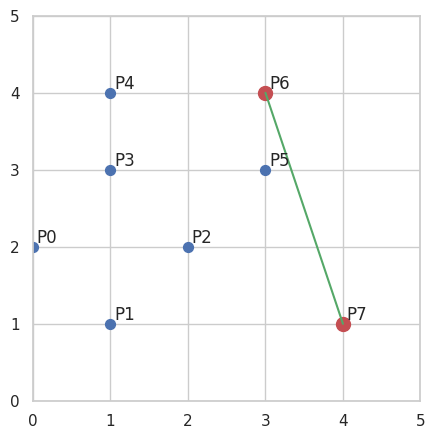

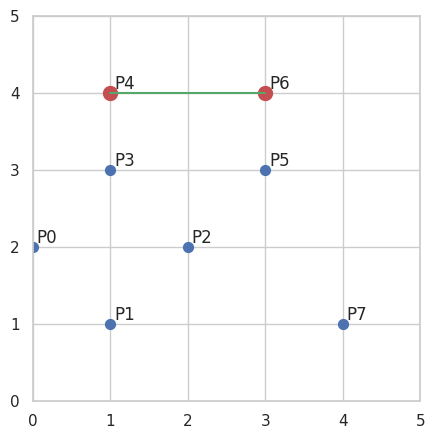

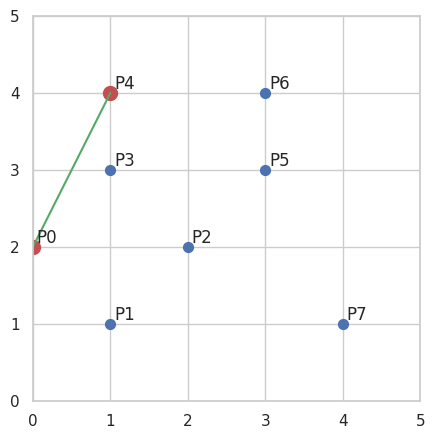

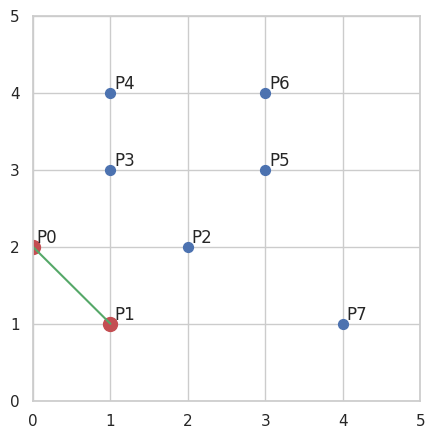

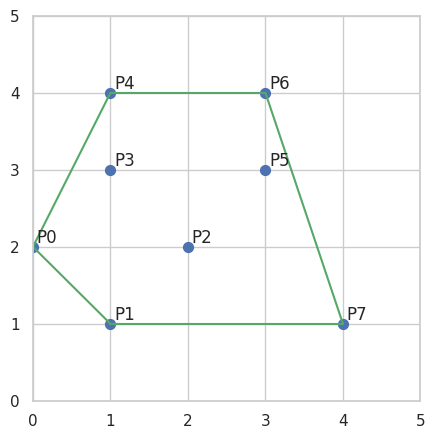

In [5]:
def rotation(a, b, c):
    # Calculate the cross product of the vectors ab and ac
    # If the cross product is positive, then the angle between
    # the vectors ab and ac is less than 180 degrees
    # If the cross product is negative, then the angle between
    # the vectors ab and ac is greater than 180 degrees
    # If the cross product is zero, then the vectors are collinear
    cross_product = (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0])
    if cross_product > 0:
        return "clockwise"
    elif cross_product < 0:
        return "counterclockwise"
    else:
        return "collinear"
    
def jarvis_march(points):
    # Find the minimum point in the set of points
    min = points[0]
    for point in points:
        if point[1] < min[1]:
            min = point
    plot_min(points, min)
    
    curr = min
    next = None
    convex_hull = []
    
    while True:
        convex_hull.append(curr)
        next = points[0]
        for point in points:
            # If the point is the current point, skip it
            if point == curr:
                continue
            # If the next point is the current point, set the next point to the current point
            if next == curr:
                next = point
            # If the rotation of the vectors ab and ac is counterclockwise, then
            # the next point is the current point
            elif rotation(curr, next, point) == "counterclockwise":
                next = point
        plot_line(points, curr, next)
        curr = next
        if curr == min:
            break
    return convex_hull

convex_hull = jarvis_march(points)

# Draw the convex hull
def plot_convex_hull(points, convex_hull):
    plt.figure(figsize=(5,5))
    plt.xlim(0,5)
    plt.ylim(0,5) 
    for point in points:
        plt.scatter(point[0], point[1], s=50, c='b')
        plt.annotate(point[2], (point[0]+0.05, point[1]+0.05))
    for i in range(len(convex_hull)):
        a = convex_hull[i]
        b = convex_hull[(i+1) % len(convex_hull)]
        plt.plot([a[0], b[0]], [a[1], b[1]], c='g')
    plt.show()
    
plot_convex_hull(points, convex_hull)
        

### Algorithm 02: Graham Scan
### Explanation:
Graham scan is a method of finding the convex hull of a finite set of points in the plane with time complexity O(n log n). It is named after Ronald Graham, who published the original algorithm in 1972. The algorithm finds all vertices of the convex hull ordered along its boundary. It uses a stack to detect and remove concavities in the boundary efficiently.

### Algorithm:
1. Find the bottommost point.
2. Sort the points by polar angle in counterclockwise order around the bottommost point. If two or more points have the same polar angle, remove all but the one that is farthest from the bottommost point.
3. Push the first three points onto the stack.
4. For each remaining point i, do:
    1. While the angle formed by points next-to-top, top, and points[i] makes a non-left turn, do:
        1. Pop the top point off the stack.
    2. Push points[i] onto the stack.

### Algorithm 03: Quick Hull
### Explanation:
Quickhull is a method of computing the convex hull of a finite set of points in the plane with time complexity O(n log n). It was invented by Barber, Dobkin, and Huhdanpaa in 1983. It is named after the quicksort algorithm, which it resembles. The algorithm finds all vertices of the convex hull ordered along its boundary. It uses a stack to detect and remove concavities in the boundary efficiently.

### Algorithm:
1. Find the two points with the largest x-coordinate. These points are the initial extreme points of the convex hull.
2. Partition the remaining points into two subsets S1 and S2, based on which side of the line through the two extreme points each point lies.
3. Find the point in S1 that is the farthest from the line through the two extreme points. This point is the next extreme point of the convex hull.
4. Repeat steps 2 and 3 until all points in S1 and S2 have been processed.
5. The convex hull has been found.


### Cross product of two vectors

$$
\vec{a} \times \vec{b} = \begin{vmatrix}
\vec{i} & \vec{j} & \vec{k} \\
\vec{a} & \vec{b} & 0 \\
\end{vmatrix}
$$

if $\vec{a} \times \vec{b} = 0$ then $\vec{a}$ and $\vec{b}$ are parallel.
if $\vec{a} \times \vec{b} > 0$ then $\vec{a}$ and $\vec{b}$ are clockwise.
if $\vec{a} \times \vec{b} < 0$ then $\vec{a}$ and $\vec{b}$ are anti-clockwise.

### Polar angle of a vector

$$
\theta = \arctan \left( \frac{y}{x} \right)
$$

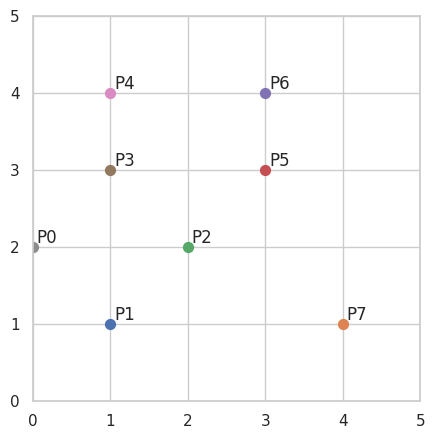

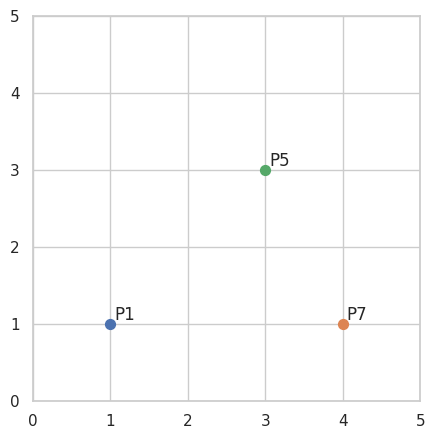

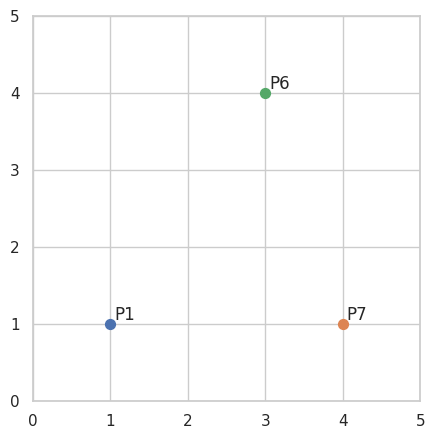

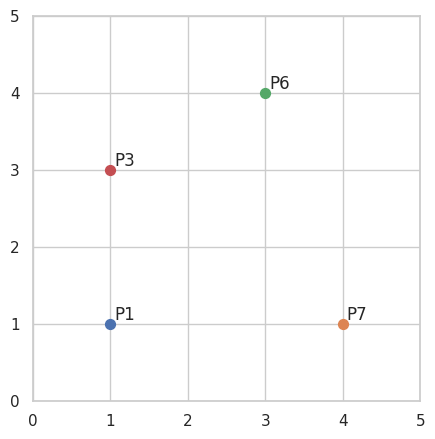

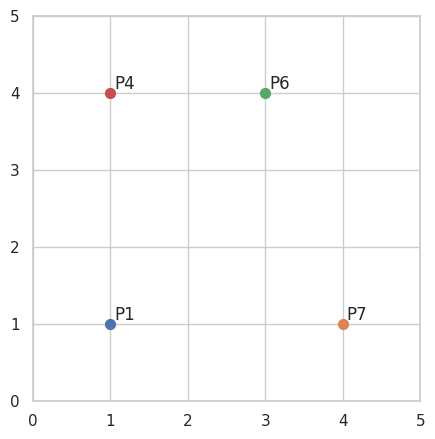

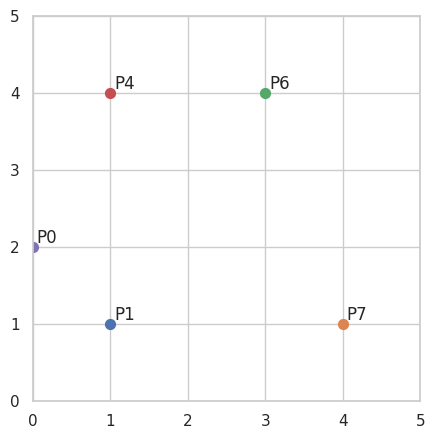

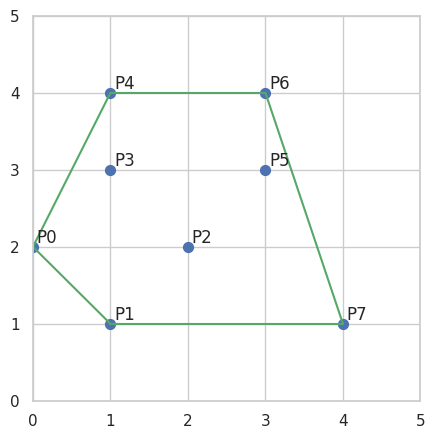

In [15]:
# Graham Scan Algorithm implementation

bottom = points[0]
for point in points:
    if point[1] < bottom[1]:
        bottom = point
    elif point[1] == bottom[1]:
        if point[0] < bottom[0]:
            bottom = point
            
def polar_angle(a, b):
    # Calculate the polar angle between the vectors ab and the x-axis
    # If the polar angle is negative, then add 360 degrees to it
    polar_angle = np.arctan2(b[1] - a[1], b[0] - a[0]) * 180 / np.pi
    if polar_angle < 0:
        polar_angle += 360
    return polar_angle

def graham_scan(points):
    # Sort the points by polar angle in ascending order
    # If two points have the same polar angle, then sort by distance from the bottom point
    points.sort(key=lambda point: (polar_angle(bottom, point), np.sqrt((point[0] - bottom[0])**2 + (point[1] - bottom[1])**2)))
    plot_points(points)
    
    stack = [points[0], points[1], points[2]]
    
    for i in range(3, len(points)):
        while True:
            cross_product = (stack[-1][0] - stack[-2][0]) * (points[i][1] - stack[-2][1]) - (stack[-1][1] - stack[-2][1]) * (points[i][0] - stack[-2][0])
            if cross_product < 0:
                stack.pop()
            else:
                break
        stack.append(points[i])
        plot_points(stack)
    return stack

convex_hull = graham_scan(points)
plot_convex_hull(points, convex_hull)
    